# EDA

We proceed to perform the EDA with the datasets that were normalized in a first step, where you can observe in the [ETL.ipynb](ETL) file the information on the number of nulls, duplicates, and unnecessary information that was eliminated. Here we will evaluate and proceed with the selection of variables for recommendation and machine learning models

# Imports

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Steam_Games EDA

In [2]:
df_games = pd.read_parquet('./Steam_Games_Clean.parquet')
df_games.head()

,title,id,developer,Action,Casual,Indie,Simulation,Strategy,Free to Play,RPG,...,Video Production,Web Publishing,Education,Software Training,Utilities,Design &amp; Illustration,Audio Production,Photo Editing,Accounting,year
index,,,,,,,,,,,,,,,,,,,,,
88310,Lost Summoner Kitty,761140,Kotoshiro,1,1,1,1,1,0,0,...,0,0,0,0,0,0,0,0,0,2018
88311,Ironbound,643980,Secret Level SRL,0,0,1,0,1,1,1,...,0,0,0,0,0,0,0,0,0,2018
88312,Real Pool 3D - Poolians,670290,Poolians.com,0,1,1,1,0,1,0,...,0,0,0,0,0,0,0,0,0,2017
88313,弹炸人2222,767400,彼岸领域,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2017
88315,Battle Royale Trainer,772540,Trickjump Games Ltd,1,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,2018


In [8]:
df_games.info()

<class 'pandas.core.frame.DataFrame'>
Index: 28662 entries, 88310 to 120443
Data columns (total 26 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   title                      28662 non-null  object
 1   id                         28662 non-null  object
 2   developer                  28662 non-null  object
 3   Action                     28662 non-null  int32 
 4   Casual                     28662 non-null  int32 
 5   Indie                      28662 non-null  int32 
 6   Simulation                 28662 non-null  int32 
 7   Strategy                   28662 non-null  int32 
 8   Free to Play               28662 non-null  int32 
 9   RPG                        28662 non-null  int32 
 10  Sports                     28662 non-null  int32 
 11  Adventure                  28662 non-null  int32 
 12  Racing                     28662 non-null  int32 
 13  Early Access               28662 non-null  int32 
 14  Massiv

In [9]:
df_games.describe()

,Action,Casual,Indie,Simulation,Strategy,Free to Play,RPG,Sports,Adventure,Racing,...,Video Production,Web Publishing,Education,Software Training,Utilities,Design &amp; Illustration,Audio Production,Photo Editing,Accounting,year
count,28662.000000,28662.000000,28662.000000,28662.000000,28662.000000,28662.000000,28662.000000,28662.000000,28662.000000,28662.000000,...,28662.000000,28662.000000,28662.000000,28662.000000,28662.000000,28662.000000,28662.000000,28662.000000,28662.000000,28662.0
mean,0.391634,0.288291,0.550869,0.232712,0.241295,0.070163,0.190043,0.043682,0.285814,0.037646,...,0.003908,0.009246,0.004361,0.003524,0.011688,0.016049,0.003070,0.002686,0.000244,2014.830298
std,0.488124,0.452975,0.497414,0.422568,0.427876,0.255425,0.392341,0.204389,0.451809,0.190341,...,0.062390,0.095711,0.065896,0.059258,0.107479,0.125667,0.055326,0.051763,0.015626,3.255668
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1983.0
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2014.0
50%,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2016.0
75%,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2017.0
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2021.0


In [4]:
# Calculate the number of records
print(f'The number of records is: {df_games.shape[0]}')

# Check data types and null values
info_df_games = pd.DataFrame({
    'Data Type': df_games.dtypes,
    'Null Values': df_games.isnull().sum(),
    'Percentage of Non-Null Values': df_games.notnull().mean() * 100,
    'Percentage of Null Values': df_games.isnull().mean() * 100
})
info_df_games


The number of records is: 28662


,Data Type,Null Values,Percentage of Non-Null Values,Percentage of Null Values
title,object,0,100.0,0.0
id,object,0,100.0,0.0
developer,object,0,100.0,0.0
Action,int32,0,100.0,0.0
Casual,int32,0,100.0,0.0
Indie,int32,0,100.0,0.0
Simulation,int32,0,100.0,0.0
Strategy,int32,0,100.0,0.0
Free to Play,int32,0,100.0,0.0
RPG,int32,0,100.0,0.0


This dataset has 26 columns and 28662 records. To recall, it contains information related to each game, such as the release year, application and game name, developer and publisher, as well as the genre. It's important to note that the information is repeated because a game can belong to more than one genre

Distribution of Release Year

C:\Users\mateo\AppData\Local\Temp\ipykernel_7144\1472404621.py:6: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(filtered_df['year'].dropna(), bins=30, kde=True, palette='viridis')


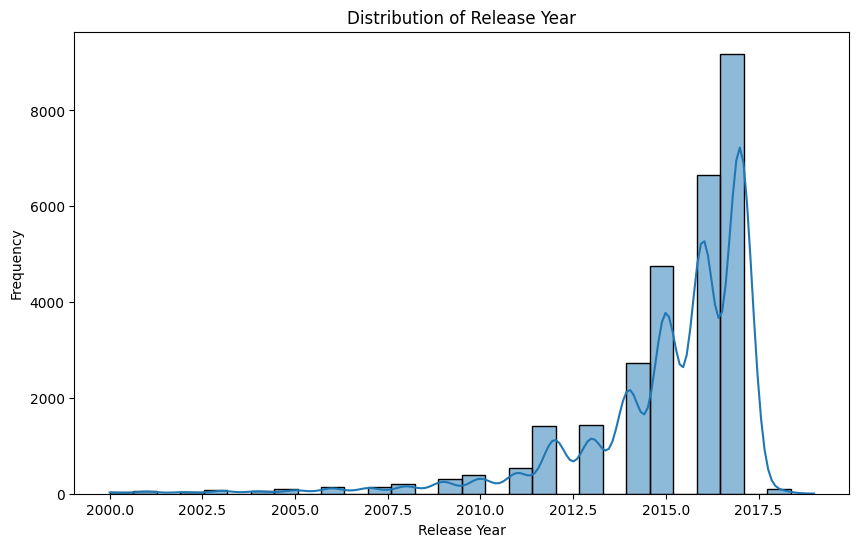

In [15]:
# Filter the data to include only years between 2000 and 2020
filtered_df = df_games[(df_games['year'] >= 2000) & (df_games['year'] <= 2020)]

# Create the histogram with colored bins
plt.figure(figsize=(10, 6))
sns.histplot(filtered_df['year'].dropna(), bins=30, kde=True, palette='viridis')
plt.title('Distribution of Release Year')
plt.xlabel('Release Year')
plt.ylabel('Frequency')
plt.show()


Genre Distribution

C:\Users\mateo\AppData\Local\Temp\ipykernel_7144\2487524487.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=genre_counts.index, y=genre_counts.values, palette='viridis')


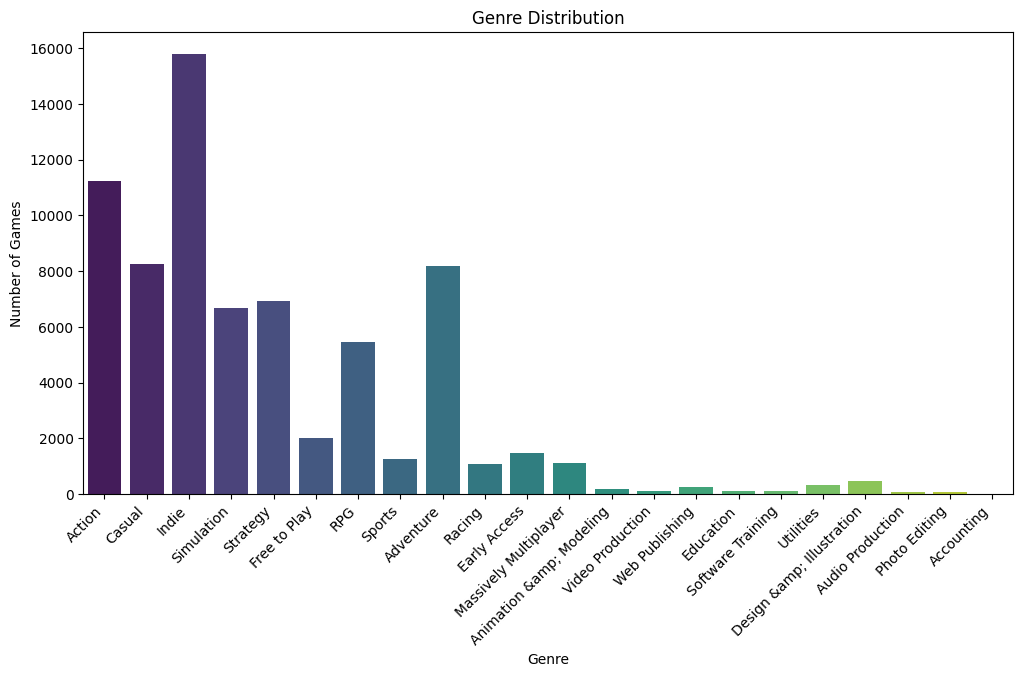

In [14]:
plt.figure(figsize=(12, 6))
genre_counts = df_games[['Action', 'Casual', 'Indie', 'Simulation', 'Strategy', 'Free to Play', 'RPG', 'Sports', 'Adventure', 'Racing', 'Early Access', 'Massively Multiplayer', 'Animation &amp; Modeling', 'Video Production', 'Web Publishing', 'Education', 'Software Training', 'Utilities', 'Design &amp; Illustration', 'Audio Production', 'Photo Editing', 'Accounting']].sum()
sns.barplot(x=genre_counts.index, y=genre_counts.values, palette='viridis')
plt.title('Genre Distribution')
plt.xlabel('Genre')
plt.ylabel('Number of Games')
plt.xticks(rotation=45, ha='right')  
plt.show()

Here we can observe the distribution of genres. There is a clear difference in which genres are more chosen for development.

Correlations between Genres

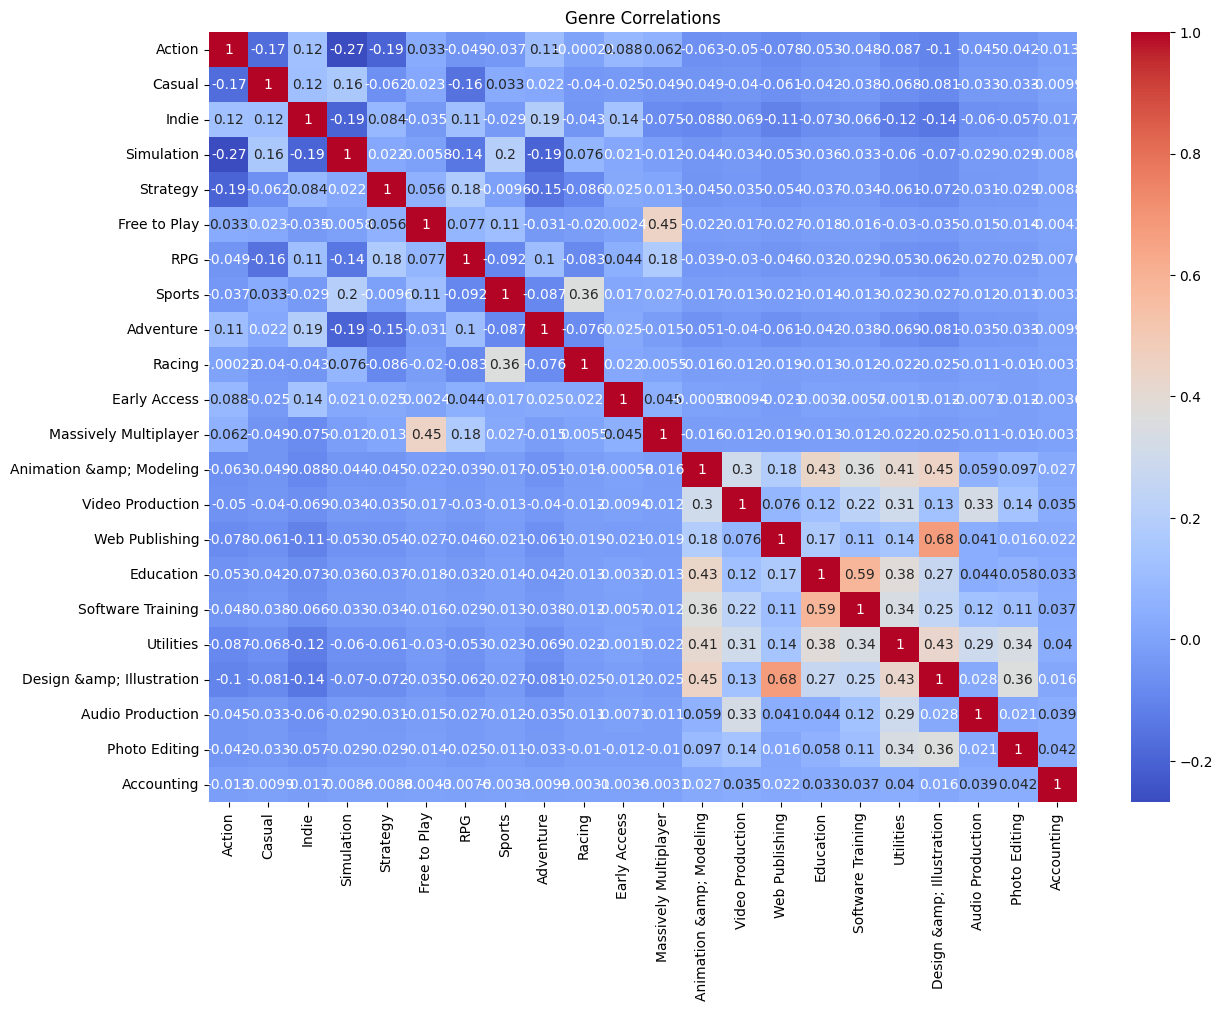

In [6]:

plt.figure(figsize=(14, 10))
genre_corr = df_games[['Action', 'Casual', 'Indie', 'Simulation', 'Strategy', 'Free to Play', 'RPG', 'Sports', 'Adventure', 'Racing', 'Early Access', 'Massively Multiplayer', 'Animation &amp; Modeling', 'Video Production', 'Web Publishing', 'Education', 'Software Training', 'Utilities', 'Design &amp; Illustration', 'Audio Production', 'Photo Editing', 'Accounting']].corr()
sns.heatmap(genre_corr, cmap='coolwarm', annot=True)
plt.title('Genre Correlations')
plt.show()

Here we observe what we mentioned before, where two games belong to more than one category

Genres on Specific Developer

C:\Users\mateo\AppData\Local\Temp\ipykernel_25120\3229015617.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_developer_counts.values, y=top_developer_counts.index, palette='viridis')


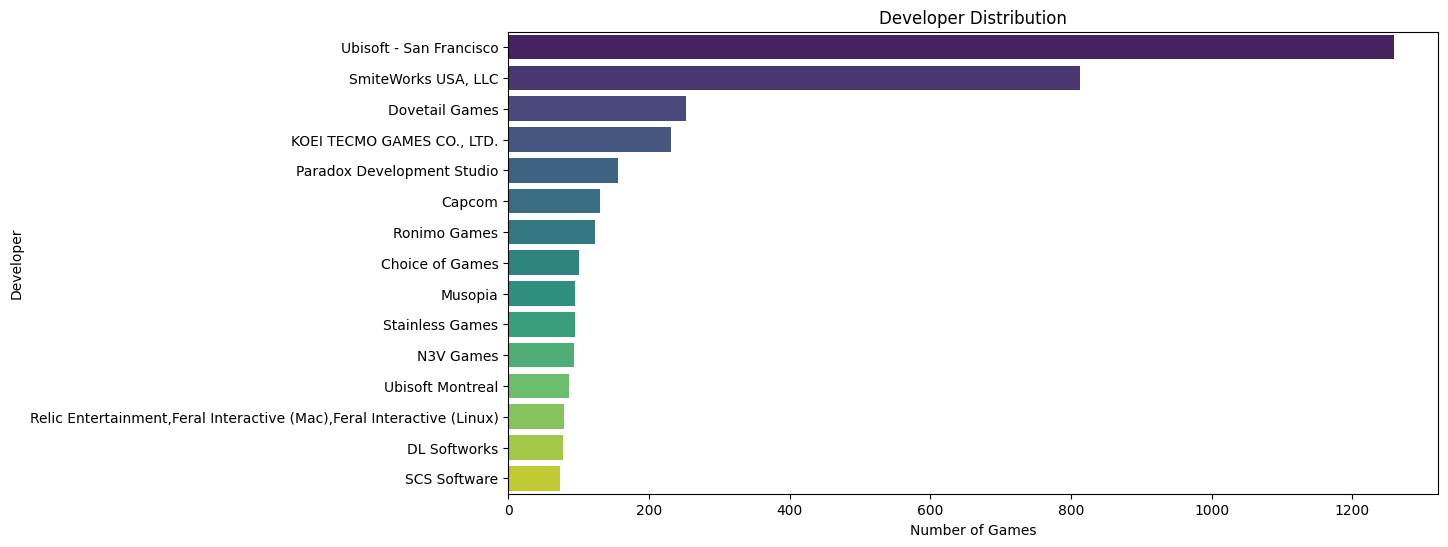

In [7]:
plt.figure(figsize=(12, 6))
top_developer_counts = df_games['developer'].value_counts().head(15)  
sns.barplot(x=top_developer_counts.values, y=top_developer_counts.index, palette='viridis')
plt.title('Developer Distribution')
plt.xlabel('Number of Games')
plt.ylabel('Developer')
plt.show()

We can see the top 15 most important developers, but this doesn't necessarily mean they are the best developers or that their games are the most widely used

# User_Reviews EDA

In [12]:
df_review = pd.read_parquet('./Reviews_clean.parquet')
df_review.head()

,user_id,item_id,recommend,review,posted year,sentiment_analysis
index,,,,,,
0,76561197970982479,1250,True,Simple yet with great replayability. In my opi...,2011,2
0,76561197970982479,22200,True,It's unique and worth a playthrough.,2011,2
0,76561197970982479,43110,True,Great atmosphere. The gunplay can be a bit chu...,2011,1
1,js41637,251610,True,I know what you think when you see this title ...,2014,2
1,js41637,227300,True,For a simple (it's actually not all that simpl...,2013,1


In [13]:
df_review.info()

<class 'pandas.core.frame.DataFrame'>
Index: 58431 entries, 0 to 25798
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   user_id             58431 non-null  object  
 1   item_id             58431 non-null  object  
 2   recommend           58431 non-null  boolean 
 3   review              58431 non-null  object  
 4   posted year         48498 non-null  object  
 5   sentiment_analysis  58431 non-null  category
dtypes: boolean(1), category(1), object(4)
memory usage: 2.4+ MB


In [14]:
df_review.describe()

,user_id,item_id,recommend,review,posted year,sentiment_analysis
count,58431,58431,58431,58431,48498,58431
unique,25458,3682,2,55313,6,3
top,76561198108415635,730,True,good game,2014,2
freq,10,3708,51692,98,21834,25888


In [16]:
# Calculate the number of records
print(f'The number of records is: {df_review.shape[0]}')

# Check data types and null values
info_df_reviews = pd.DataFrame({
    'Data Type': df_review.dtypes,
    'Null Values': df_review.isnull().sum(),
    'Percentage of Non-Null Values': df_review.notnull().mean() * 100,
    'Percentage of Null Values': df_review.isnull().mean() * 100
})
info_df_reviews

The number of records is: 58431


,Data Type,Null Values,Percentage of Non-Null Values,Percentage of Null Values
user_id,object,0,100.000000,0.000000
item_id,object,0,100.000000,0.000000
recommend,boolean,0,100.000000,0.000000
review,object,0,100.000000,0.000000
posted year,object,9933,83.000462,16.999538
sentiment_analysis,category,0,100.000000,0.000000


We can see the 9,933 null values that we kept and did not eliminate to use the rest of the information

# Sentiment Distribution

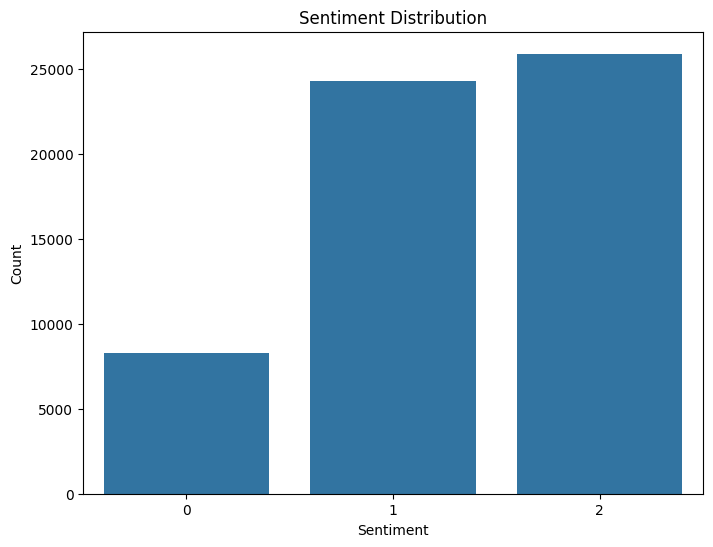

In [20]:
# Set the figure size
plt.figure(figsize=(8, 6))
sns.countplot(x='sentiment_analysis', data=df_review)
plt.title('Sentiment Distribution')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()

We can see the difference between negative comments, which reach around 7000, and neutral and positive ones, each approximately totaling 25000

# Relationship between Sentiments and Recommendations

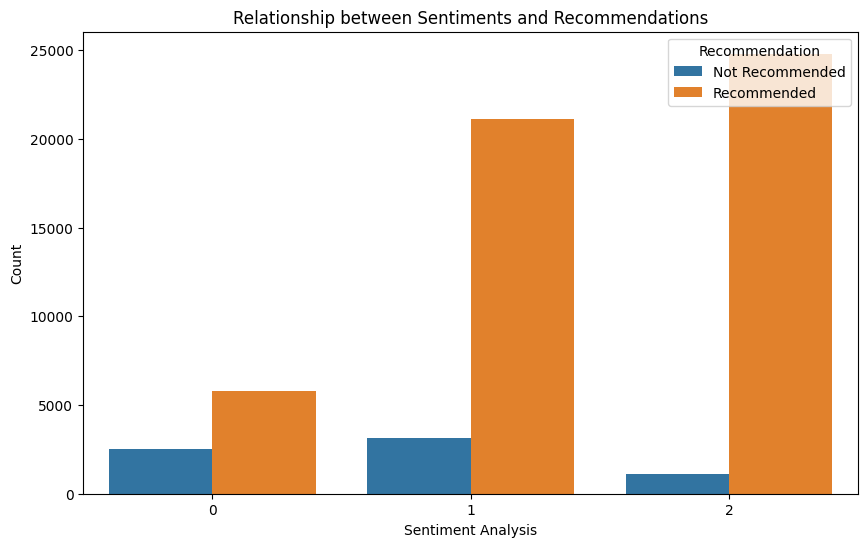

In [46]:

plt.figure(figsize=(10, 6))
sns.countplot(x='sentiment_analysis', hue='recommend', data=df_review)
plt.title('Relationship between Sentiments and Recommendations')
plt.xlabel('Sentiment Analysis')
plt.ylabel('Count')
plt.legend(title='Recommendation', loc='upper right', labels=['Not Recommended', 'Recommended'])
plt.show()

We can observe that the majority of recommendations persist even when there is a negative comment about the game. In other words, recommendations prevail for games regardless of their comments

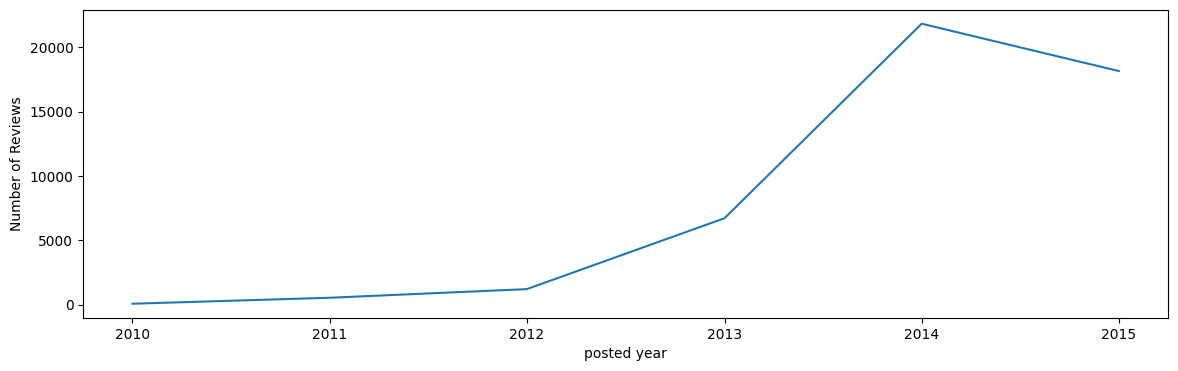

In [30]:
# Convert to date format
df_review["posted year"] = pd.to_datetime(df_review["posted year"])

# Calculate the number of reviews per date
df_counts = df_review.groupby("posted year").count()

# Plot
plt.figure(figsize=(14, 4))
sns.lineplot(data=df_counts, x="posted year", y="recommend")
plt.ylabel('Number of Reviews')
plt.show()

Here we can observe the distribution of the posting dates of comments, where there is a very high peak in the year 2014 that comes from an increasing trend starting in 2012.

Word cloud of the most frequent terms in the reviews

the goal is to get an overview of the most used words in user reviews on Steam, perhaps indicating some positive or negative categorization

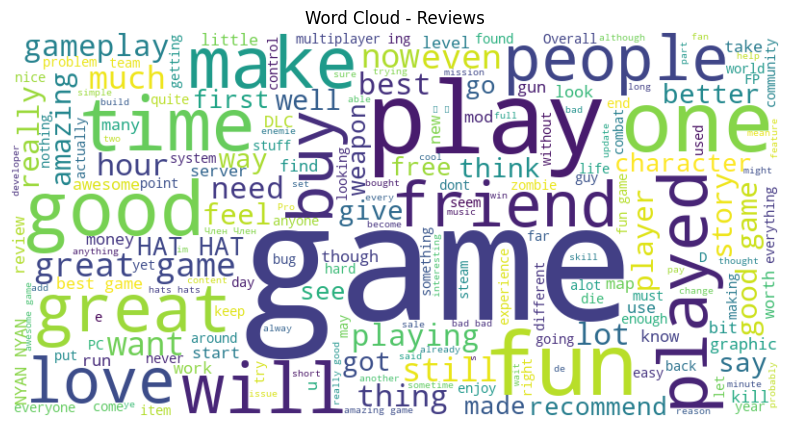

In [45]:
from wordcloud import WordCloud
# Concatenate all reviews into a single text
text = ' '.join(df_review['review'].astype(str))

# Create the WordCloud object
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud - Reviews')
plt.show()

Here we can see what we were mentioning in the previous graphs, where positive comments towards the games prevail.


# User_Items EDA

In [31]:
df_items = pd.read_parquet('./User_Item_Clean.parquet')
df_items.head()

,item_id,playtime_forever,steam_id,user_id
0,10,6,76561197970982479,76561197970982479
1,20,0,76561197970982479,76561197970982479
2,30,7,76561197970982479,76561197970982479
3,40,0,76561197970982479,76561197970982479
4,50,0,76561197970982479,76561197970982479


In [32]:
df_items.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5094105 entries, 0 to 5094104
Data columns (total 4 columns):
 #   Column            Dtype 
---  ------            ----- 
 0   item_id           object
 1   playtime_forever  int64 
 2   steam_id          object
 3   user_id           object
dtypes: int64(1), object(3)
memory usage: 155.5+ MB


In [35]:
# Calculate the number of records
print(f'The number of records is: {df_items.shape[0]}')

# Check data types and null values
info_df_items = pd.DataFrame({
    'Data Type': df_items.dtypes,
    'Null Values': df_items.isnull().sum(),
    'Percentage of Non-Nulls': df_items.notnull().mean() * 100,
    'Percentage of Nulls': df_items.isnull().mean() * 100
})
info_df_items

The number of records is: 5094105


,Data Type,Null Values,Percentage of Non-Nulls,Percentage of Nulls
item_id,object,0,100.0,0.0
playtime_forever,int64,0,100.0,0.0
steam_id,object,0,100.0,0.0
user_id,object,0,100.0,0.0


This dataset has 4 columns and 5094105 records. As a reminder, it contains information related to users and the games they consume, such as the accumulated time (in hours) they have played a game, as well as the identifiers of the games they consume and the user itself.


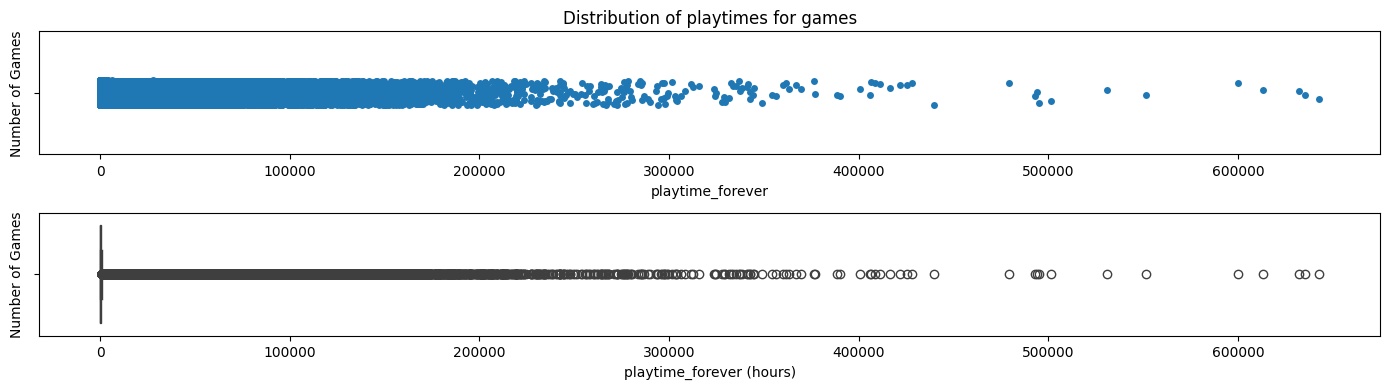

In [43]:
# Create a figure with two vertically stacked subplots
fig = plt.figure(figsize=(14, 4))

# Add the first subplot (stripplot)
ax1 = fig.add_subplot(211)
sns.stripplot(data=df_items, x='playtime_forever', ax=ax1)

# Labels and title configuration for the first subplot
ax1.set_xlabel('playtime_forever')
ax1.set_ylabel('Number of Games')
ax1.set_title('Distribution of playtimes for games')

# Add the second subplot (boxplot) sharing the x-axis with the first subplot
ax2 = fig.add_subplot(212, sharex=ax1)
sns.boxplot(data=df_items, x='playtime_forever', ax=ax2)

# Labels configuration for the second subplot
ax2.set_xlabel('playtime_forever (hours)')
ax2.set_ylabel('Number of Games')

# Adjust the spacing between subplots
plt.tight_layout()

# Show the figure
plt.show()
